<a href="https://colab.research.google.com/github/Aicoaching2025/Categorical-vs-Categorical-Data/blob/main/Categorical_vs_Categorical_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/titanic.csv'
data = pd.read_csv(file_path)
print(data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                  

#### Select Categorical variable analysis

In [7]:
# Define categorical variables for analysis
x_variable = "Survived"  # Independent variable
y_variable = "Pclass"     # Dependent variable

# Ensure selected variables are categorical
data[x_variable] = data[x_variable].astype(str)  # Convert to string
data[y_variable] = data[y_variable].astype(str)  # Convert to string

# Display unique values for each selected column
print(f"Unique values in {x_variable}: {data[x_variable].unique()}")
print(f"Unique values in {y_variable}: {data[y_variable].unique()}")


Unique values in Survived: ['0' '1']
Unique values in Pclass: ['3' '1' '2']


#### Create Contingency Table

In [8]:
# Contingency Table (Frequencies)
contingency_table = pd.crosstab(data[y_variable], data[x_variable])
print("Contingency Table (Frequencies):")
print(contingency_table)

# Contingency Table (Proportions)
proportions_table = contingency_table / contingency_table.sum().sum()
print("Contingency Table (Proportions):")
print(proportions_table)


Contingency Table (Frequencies):
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
Contingency Table (Proportions):
Survived         0         1
Pclass                      
1         0.089787  0.152637
2         0.108866  0.097643
3         0.417508  0.133558


####Choose the Axis and Make Visualiuzations

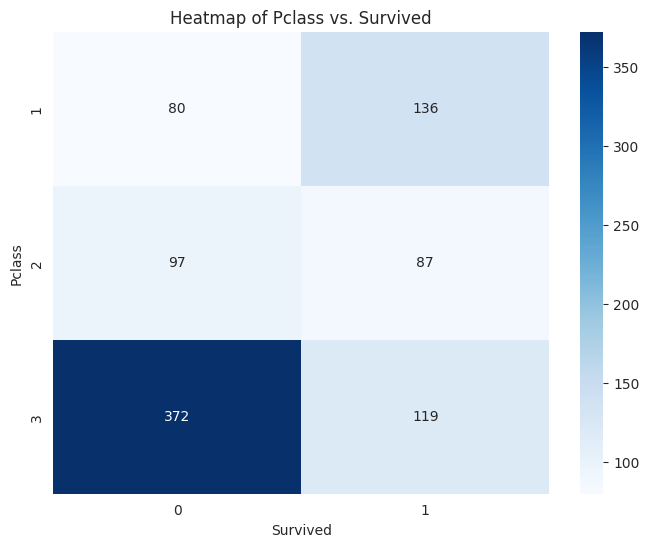

<Figure size 800x600 with 0 Axes>

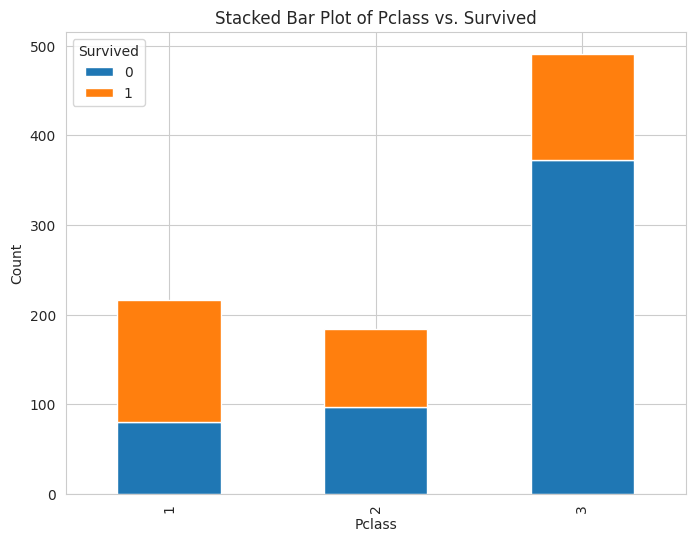

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set_style("whitegrid")

# Heatmap of Frequencies
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt="d")
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.title(f"Heatmap of {y_variable} vs. {x_variable}")
plt.show()

# Bar Plot (Frequencies)
plt.figure(figsize=(8, 6))
contingency_table.plot(kind="bar", stacked=True, figsize=(8, 6))
plt.xlabel(y_variable)
plt.ylabel("Count")
plt.title(f"Stacked Bar Plot of {y_variable} vs. {x_variable}")
plt.legend(title=x_variable)
plt.show()


####Perform the Chi Square Test

Chi-Square Statistic: 102.88898875696056
P-value: 4.549251711298793e-23
Expected Frequencies:
Survived           0           1
Pclass                          
1         133.090909   82.909091
2         113.373737   70.626263
3         302.535354  188.464646


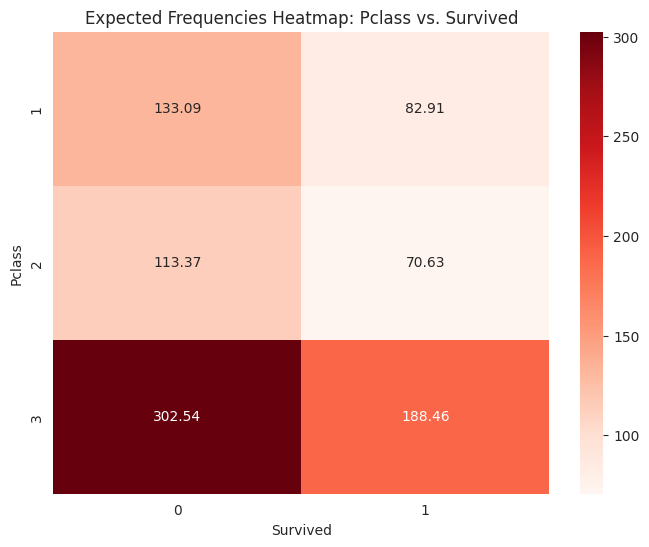

In [10]:
from scipy.stats import chi2_contingency

# Compute the Chi-Square statistic
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Convert expected frequencies to a DataFrame
expected_frequencies = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)

# Display results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print("Expected Frequencies:")
print(expected_frequencies)

# Heatmap of Expected Frequencies
plt.figure(figsize=(8, 6))
sns.heatmap(expected_frequencies, annot=True, cmap="Reds", fmt=".2f")
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.title(f"Expected Frequencies Heatmap: {y_variable} vs. {x_variable}")
plt.show()


####Compute Marginal Proportions

In [11]:
# Compute row-wise marginal proportions (relative to total count)
row_marginal_proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Compute column-wise marginal proportions
column_marginal_proportions = contingency_table.div(contingency_table.sum(axis=0), axis=1)

# Compute total marginal proportions (each category's proportion relative to total sum)
total_marginal_proportions = contingency_table.sum(axis=1) / contingency_table.sum().sum()

# Display results
print("\nRow-Wise Marginal Proportions:")
print(row_marginal_proportions)

print("\nColumn-Wise Marginal Proportions:")
print(column_marginal_proportions)

print("\nTotal Marginal Proportions:")
print(total_marginal_proportions)



Row-Wise Marginal Proportions:
Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363

Column-Wise Marginal Proportions:
Survived         0         1
Pclass                      
1         0.145719  0.397661
2         0.176685  0.254386
3         0.677596  0.347953

Total Marginal Proportions:
Pclass
1    0.242424
2    0.206510
3    0.551066
dtype: float64


####Visualizing Marginal Proportions

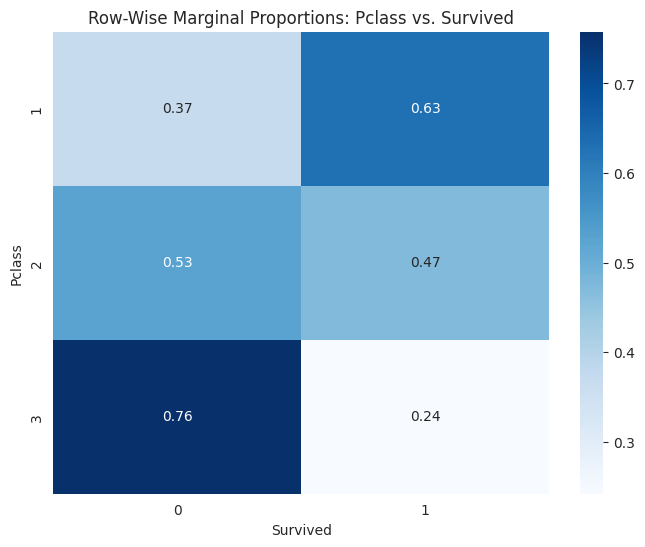

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(row_marginal_proportions, annot=True, cmap="Blues", fmt=".2f")
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.title(f"Row-Wise Marginal Proportions: {y_variable} vs. {x_variable}")
plt.show()


####Convert Heat map for Contingency Tables (Frequencies)

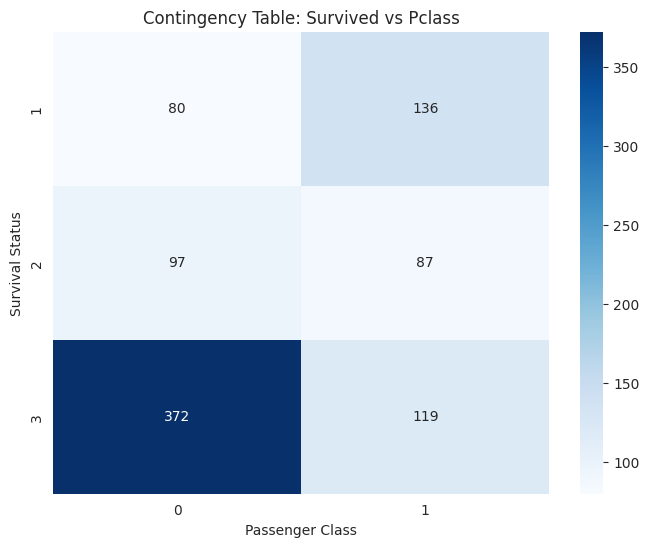

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt="d")
plt.title("Contingency Table: Survived vs Pclass")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Status")
plt.show()


####Stacked Bar Chart for Proportions

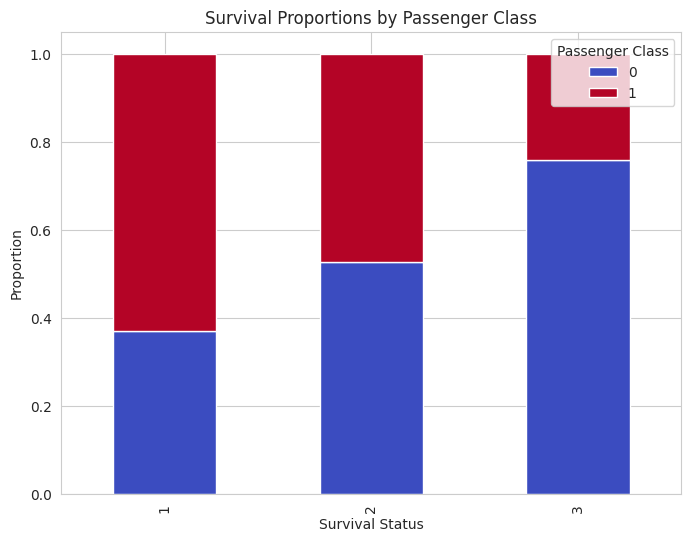

In [14]:
contingency_table_norm = contingency_table.div(contingency_table.sum(axis=1), axis=0)

contingency_table_norm.plot(kind="bar", stacked=True, figsize=(8, 6), colormap="coolwarm")
plt.title("Survival Proportions by Passenger Class")
plt.xlabel("Survival Status")
plt.ylabel("Proportion")
plt.legend(title="Passenger Class")
plt.show()


#### Pie Chart for Marginal Proportions

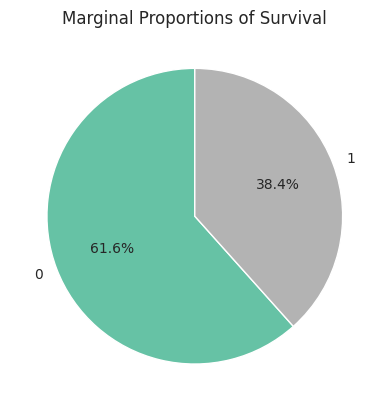

In [17]:
# Assuming you want to create a pie chart for the 'Survived' column:
data['Survived'].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90, colormap="Set2")
plt.title("Marginal Proportions of Survival")
plt.ylabel("")  # Hide the default ylabel
plt.show()

####Contingency Table

🔹 Observed Contingency Table:
Pclass     1   2   3
Survived            
0         28  28  66
1         16  19  43

🔹 Expected Contingency Table:
Pclass        1      2      3
Survived                     
0         26.84  28.67  66.49
1         17.16  18.33  42.51

🔹 Chi-Square Statistic: 0.17795558766365469
🔹 Degrees of Freedom: 2
🔹 P-Value: 0.914865889014674


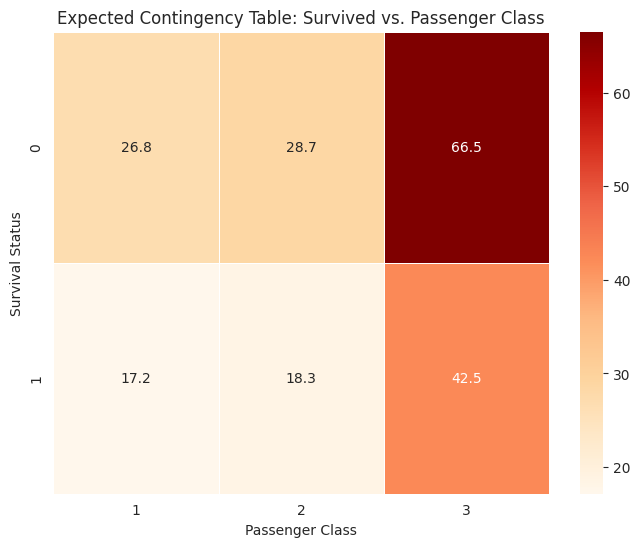

In [20]:
# 📌 Perform a Chi-Square Test for Categorical Association

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np

# ✅ Step 1: Create a Sample Dataset
np.random.seed(42)
data = pd.DataFrame({
    "Survived": np.random.choice([0, 1], size=200, p=[0.6, 0.4]),  # 60% died, 40% survived
    "Pclass": np.random.choice([1, 2, 3], size=200, p=[0.2, 0.3, 0.5])  # 20% 1st class, 30% 2nd class, 50% 3rd class
})

# ✅ Step 2: Create an Observed Contingency Table (Frequencies)
contingency_table = pd.crosstab(data["Survived"], data["Pclass"])

# ✅ Step 3: Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# ✅ Step 4: Convert Expected Values into a DataFrame
expected_frequencies = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)

# ✅ Step 5: Print Results
print("🔹 Observed Contingency Table:")
print(contingency_table)
print("\n🔹 Expected Contingency Table:")
print(expected_frequencies)
print("\n🔹 Chi-Square Statistic:", chi2_stat)
print("🔹 Degrees of Freedom:", dof)
print("🔹 P-Value:", p_value)

# ✅ Step 6: Visualize Expected Frequencies
plt.figure(figsize=(8, 6))
sns.heatmap(expected_frequencies, annot=True, cmap="OrRd", fmt=".1f", linewidths=0.5)
plt.title("Expected Contingency Table: Survived vs. Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Status")
plt.show()
